<a href="https://colab.research.google.com/github/Padmasriariveni/FAKE-NEWS-DETECTION/blob/main/FakeNewsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
true=pd.read_csv("/content/True.csv")

In [ ]:
fake=pd.read_csv("/content/Fake.csv")

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


([<matplotlib.patches.Wedge at 0x799a5382dad0>,
 [Text(-0.0908203069789766, 1.09624434860128, 'politicsNews'),
  Text(0.09082030697897621, -1.09624434860128, 'worldnews')],
 [Text(-0.049538349261259954, 0.5979514628734254, '52.63%'),
  Text(0.049538349261259745, -0.5979514628734254, '47.37%')])

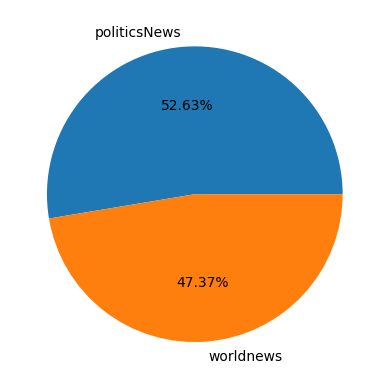

In [ ]:
from matplotlib import pyplot as plt
plt.pie(true['subject'].value_counts(),labels=true['subject'].value_counts().keys(),autopct='%1.2f%%')

In [ ]:
print(true.describe())

         label
count  21417.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0


In [ ]:
print(fake.describe())

         label
count  23481.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0


In [ ]:
true['label']=1

In [ ]:
fake['label']=0

In [ ]:
news=pd.concat([fake,true],axis=0)

In [ ]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
news.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
news.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
news=news.drop(['title','subject','date'],axis=1)

In [ ]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
news.tail()

,text,label
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1
21416,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,1


In [ ]:
news=news.sample(frac=1) #shuffles

In [ ]:
news.head()

,text,label
3034,It looks like National Security Pick Monica Cr...,0
9514,WASHINGTON (Reuters) - The U.S. presidential c...,1
20956,CARACAS (Reuters) - Venezuela s opposition is ...,1
5114,Donald Trump really should have just apologize...,0
18294,DUBAI (Reuters) - Saudi authorities said on We...,1


In [ ]:
news.reset_index(inplace=True)

In [ ]:
news.head()

,index,text,label
0,3034,It looks like National Security Pick Monica Cr...,0
1,9514,WASHINGTON (Reuters) - The U.S. presidential c...,1
2,20956,CARACAS (Reuters) - Venezuela s opposition is ...,1
3,5114,Donald Trump really should have just apologize...,0
4,18294,DUBAI (Reuters) - Saudi authorities said on We...,1


In [ ]:
news.drop(['index'],axis=1,inplace=True)

In [ ]:
news.head()

,text,label
0,It looks like National Security Pick Monica Cr...,0
1,WASHINGTON (Reuters) - The U.S. presidential c...,1
2,CARACAS (Reuters) - Venezuela s opposition is ...,1
3,Donald Trump really should have just apologize...,0
4,DUBAI (Reuters) - Saudi authorities said on We...,1


        text
label       
0      23481
1      21417


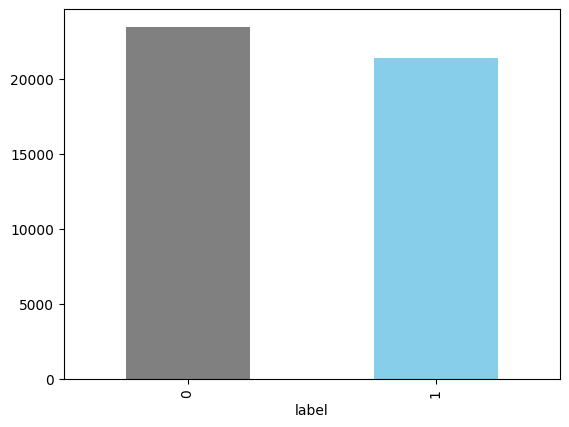

In [ ]:
import matplotlib.pyplot as plt
print(news.groupby(['label']).count())
news.label.value_counts().plot(kind='bar',color=['grey','skyblue'])
plt.show()

In [ ]:
import re

In [ ]:
def wordopt(text):
  text=text.lower() #converting to lower
  text=re.sub(r'\[.*?\]','',text) #removing square brackets
  text=re.sub(r'https?://\S+|www\.\S+','',text) #removing urls
  text=re.sub(r'<.*?>+','',text) #removing html tags
  text=re.sub(r'[^\w\s]','',text) #removing punctuations
  text=re.sub(r'\n','',text) #removing new lines
  return text

In [ ]:
news['text']=news['text'].apply(wordopt)

In [ ]:
news['text']

,text
0,it looks like national security pick monica cr...
1,washington reuters the us presidential campai...
2,caracas reuters venezuela s opposition is shi...
3,donald trump really should have just apologize...
4,dubai reuters saudi authorities said on wedne...
...,...
44893,
44894,president trump gathered the senators in the s...
44895,just when you thought donald trump s constant ...
44896,washington reuters president barack obamas sp...


In [ ]:
x=news['text']
y=news['label']

In [ ]:
x

,text
0,it looks like national security pick monica cr...
1,washington reuters the us presidential campai...
2,caracas reuters venezuela s opposition is shi...
3,donald trump really should have just apologize...
4,dubai reuters saudi authorities said on wedne...
...,...
44893,
44894,president trump gathered the senators in the s...
44895,just when you thought donald trump s constant ...
44896,washington reuters president barack obamas sp...


In [ ]:
y

,label
0,0
1,1
2,1
3,0
4,1
...,...
44893,0
44894,0
44895,0
44896,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
x_train.shape

(31428,)

In [ ]:
x_test.shape

(13470,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect=TfidfVectorizer()

In [ ]:
xv_train=vect.fit_transform(x_train)
xv_train

<31428x187005 sparse matrix of type '<class 'numpy.float64'>'
	with 6566589 stored elements in Compressed Sparse Row format>

In [ ]:
xv_test=vect.transform(x_test)
xv_test

<13470x187005 sparse matrix of type '<class 'numpy.float64'>'
	with 2764952 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR=LogisticRegression()

In [ ]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
Pred_LR=LR.predict(xv_test)

In [ ]:
LR.score(xv_test,y_test)

0.9874536005939124

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,Pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7097
           1       0.99      0.99      0.99      6373

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC=DecisionTreeClassifier()

In [ ]:
DTC.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dtc=DTC.predict(xv_test)

In [ ]:
DTC.score(xv_test,y_test)

0.9962138084632517

In [ ]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       0.99      1.00      1.00      6373

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(xv_train,y_train)

RandomForestClassifier()

In [ ]:
predict_rfc=rfc.predict(xv_test)

In [ ]:
rfc.score(xv_test,y_test)

0.9892353377876764

In [ ]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7097
           1       0.99      0.99      0.99      6373

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(xv_test,y_test)

GradientBoostingClassifier()

In [ ]:
pred_gbc=gbc.predict(xv_test)

In [ ]:
 gbc.score(xv_test,y_test)

0.9969561989606534

In [ ]:
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      1.00      1.00      6373

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [ ]:
#predicting model

In [ ]:
def output_Label(n):
  if n==0:
    return "Fake News"
  else n==1:
    return "True News"

In [ ]:
from pickle import NEWOBJ_EX
def manual_test(news):
  testing_news={"text":[news]}
  new_def_test=pd.DataFrame(testing_news)
  new_x_test=new_def_test["text"]
  new_xv_test=vect.trandorm(new_x_test)
  pred_LR=LR.predict(new_xv_test)
  pred_gbc=gbc.predict(new_xv_test)
  pred_rfc=rfc.prediction(new_xv_test)
  return '\n\nLR Prediction:{} \nGBC Prediction:{} \nRFC Prediction:{}'.format(
    output_Label(pred_LR[0]),output_Label(pred_gbc[0]),output_Label(pred_rfc[0]))

In [ ]:
news_article=str(input())